# Example: a simple 5-asset Ivy Portfolio with semi-annual rebalance and sma criteria#

In [18]:
%config InlineBackend.figure_format="retina"
%matplotlib inline

import os
import sys
import altair as alt
import pandas as pd
import pyfolio as pf
import pandas_datareader as pdr
import datetime

#alt.renderers.enable('jpg')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
backtester_dir = os.path.realpath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(backtester_dir) # Add backtester base dir to $PYTHONPATH

In [3]:
from asset_backtester import Backtest, Portfolio, Asset
from asset_backtester.datahandler import HistoricalAssetData
from asset_backtester.charts import *

In [4]:
api_key = '1daeee45348833fa26a98a8e36993b8b9c8963b5'

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 12, 31)
tickers = ["VTI", "VEU", "BND", "VNQ", "DBC"]
symbols = pdr.get_data_tiingo(tickers, api_key=api_key, start=start, end=end)

In [5]:
#os.mkdir(os.path.join(backtester_dir + '/data'))
data_dir = os.path.join(backtester_dir, 'data')
save_path = os.path.join(data_dir, 'ivy_5assets.csv')
symbols.to_csv(save_path)

In [6]:
data = HistoricalAssetData(save_path)
schema = data.schema

In [7]:
portfolio = Portfolio()

In [8]:
VTI = Asset("VTI", 0.2)
VEU = Asset("VEU", 0.2)
BND = Asset("BND", 0.2)
VNQ = Asset("VNQ", 0.2)
DBC = Asset("DBC", 0.2)
portfolio.add_assets([VTI, VEU, BND, VNQ, DBC])

In [9]:
schema = data.schema
data = HistoricalAssetData(save_path)
bt = Backtest(schema)
bt.data = data
bt.portfolio = portfolio

Now we run the example with a **semi-annualy** rebalancing and a **100 days sma** criteria 

In [10]:
#periods = months between rebalance
bt.run(initial_capital=1_000_000, periods=6, sma_days= 100)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:43


capital            cash   total_value  \
2010-01-03 00:00:00+00:00  1.000000e+06  1000000.000000           NaN   
2010-01-04 00:00:00+00:00  1.000000e+06       96.545508  9.999035e+05   
2010-01-05 00:00:00+00:00  1.001321e+06       96.545508  1.001225e+06   
2010-01-06 00:00:00+00:00  1.005603e+06       96.545508  1.005507e+06   
2010-01-07 00:00:00+00:00  1.004723e+06       96.545508  1.004627e+06   
...                                 ...             ...           ...   
2019-12-24 00:00:00+00:00  1.683855e+06   653272.965094  1.030582e+06   
2019-12-26 00:00:00+00:00  1.687395e+06   653272.965094  1.034122e+06   
2019-12-27 00:00:00+00:00  1.688627e+06   653272.965094  1.035354e+06   
2019-12-30 00:00:00+00:00  1.686899e+06   653272.965094  1.033626e+06   
2019-12-31 00:00:00+00:00  1.689952e+06   653272.965094  1.036679e+06   

                           % change  accumulated return  
2010-01-03 00:00:00+00:00       NaN                 NaN  
2010-01-04 00:00:00+00:00  0.000000            1.000000  
2010-01-05 00:00:00+00:00  0.001321            1.001321  
2010-01-06 00:00:00+00:00  0.004276            1.005603  
2010-01-07 00:00:00+00:00 -0.000875            1.004723  
...                             ...                 ...  
2019-12-24 00:00:00+00:00  0.000768            1.683855  
2019-12-26 00:00:00+00:00  0.002102            1.687395  
2019-12-27 00:00:00+00:00  0.000730            1.688627  
2019-12-30 00:00:00+00:00 -0.001023            1.686899  
2019-12-31 00:00:00+00:00  0.001810            1.689952  

[2517 rows x 5 columns]

Now we plot the close values and the sma value for the stocks

In [19]:
sma_graph(bt._data._data[bt._data._data['date']>'2011-10-10'])

alt.LayerChart(...)

plotting the wealth over time we obtain:

In [12]:
returns_chart(bt.balance)

alt.VConcatChart(...)

Now some stats using pyfolio

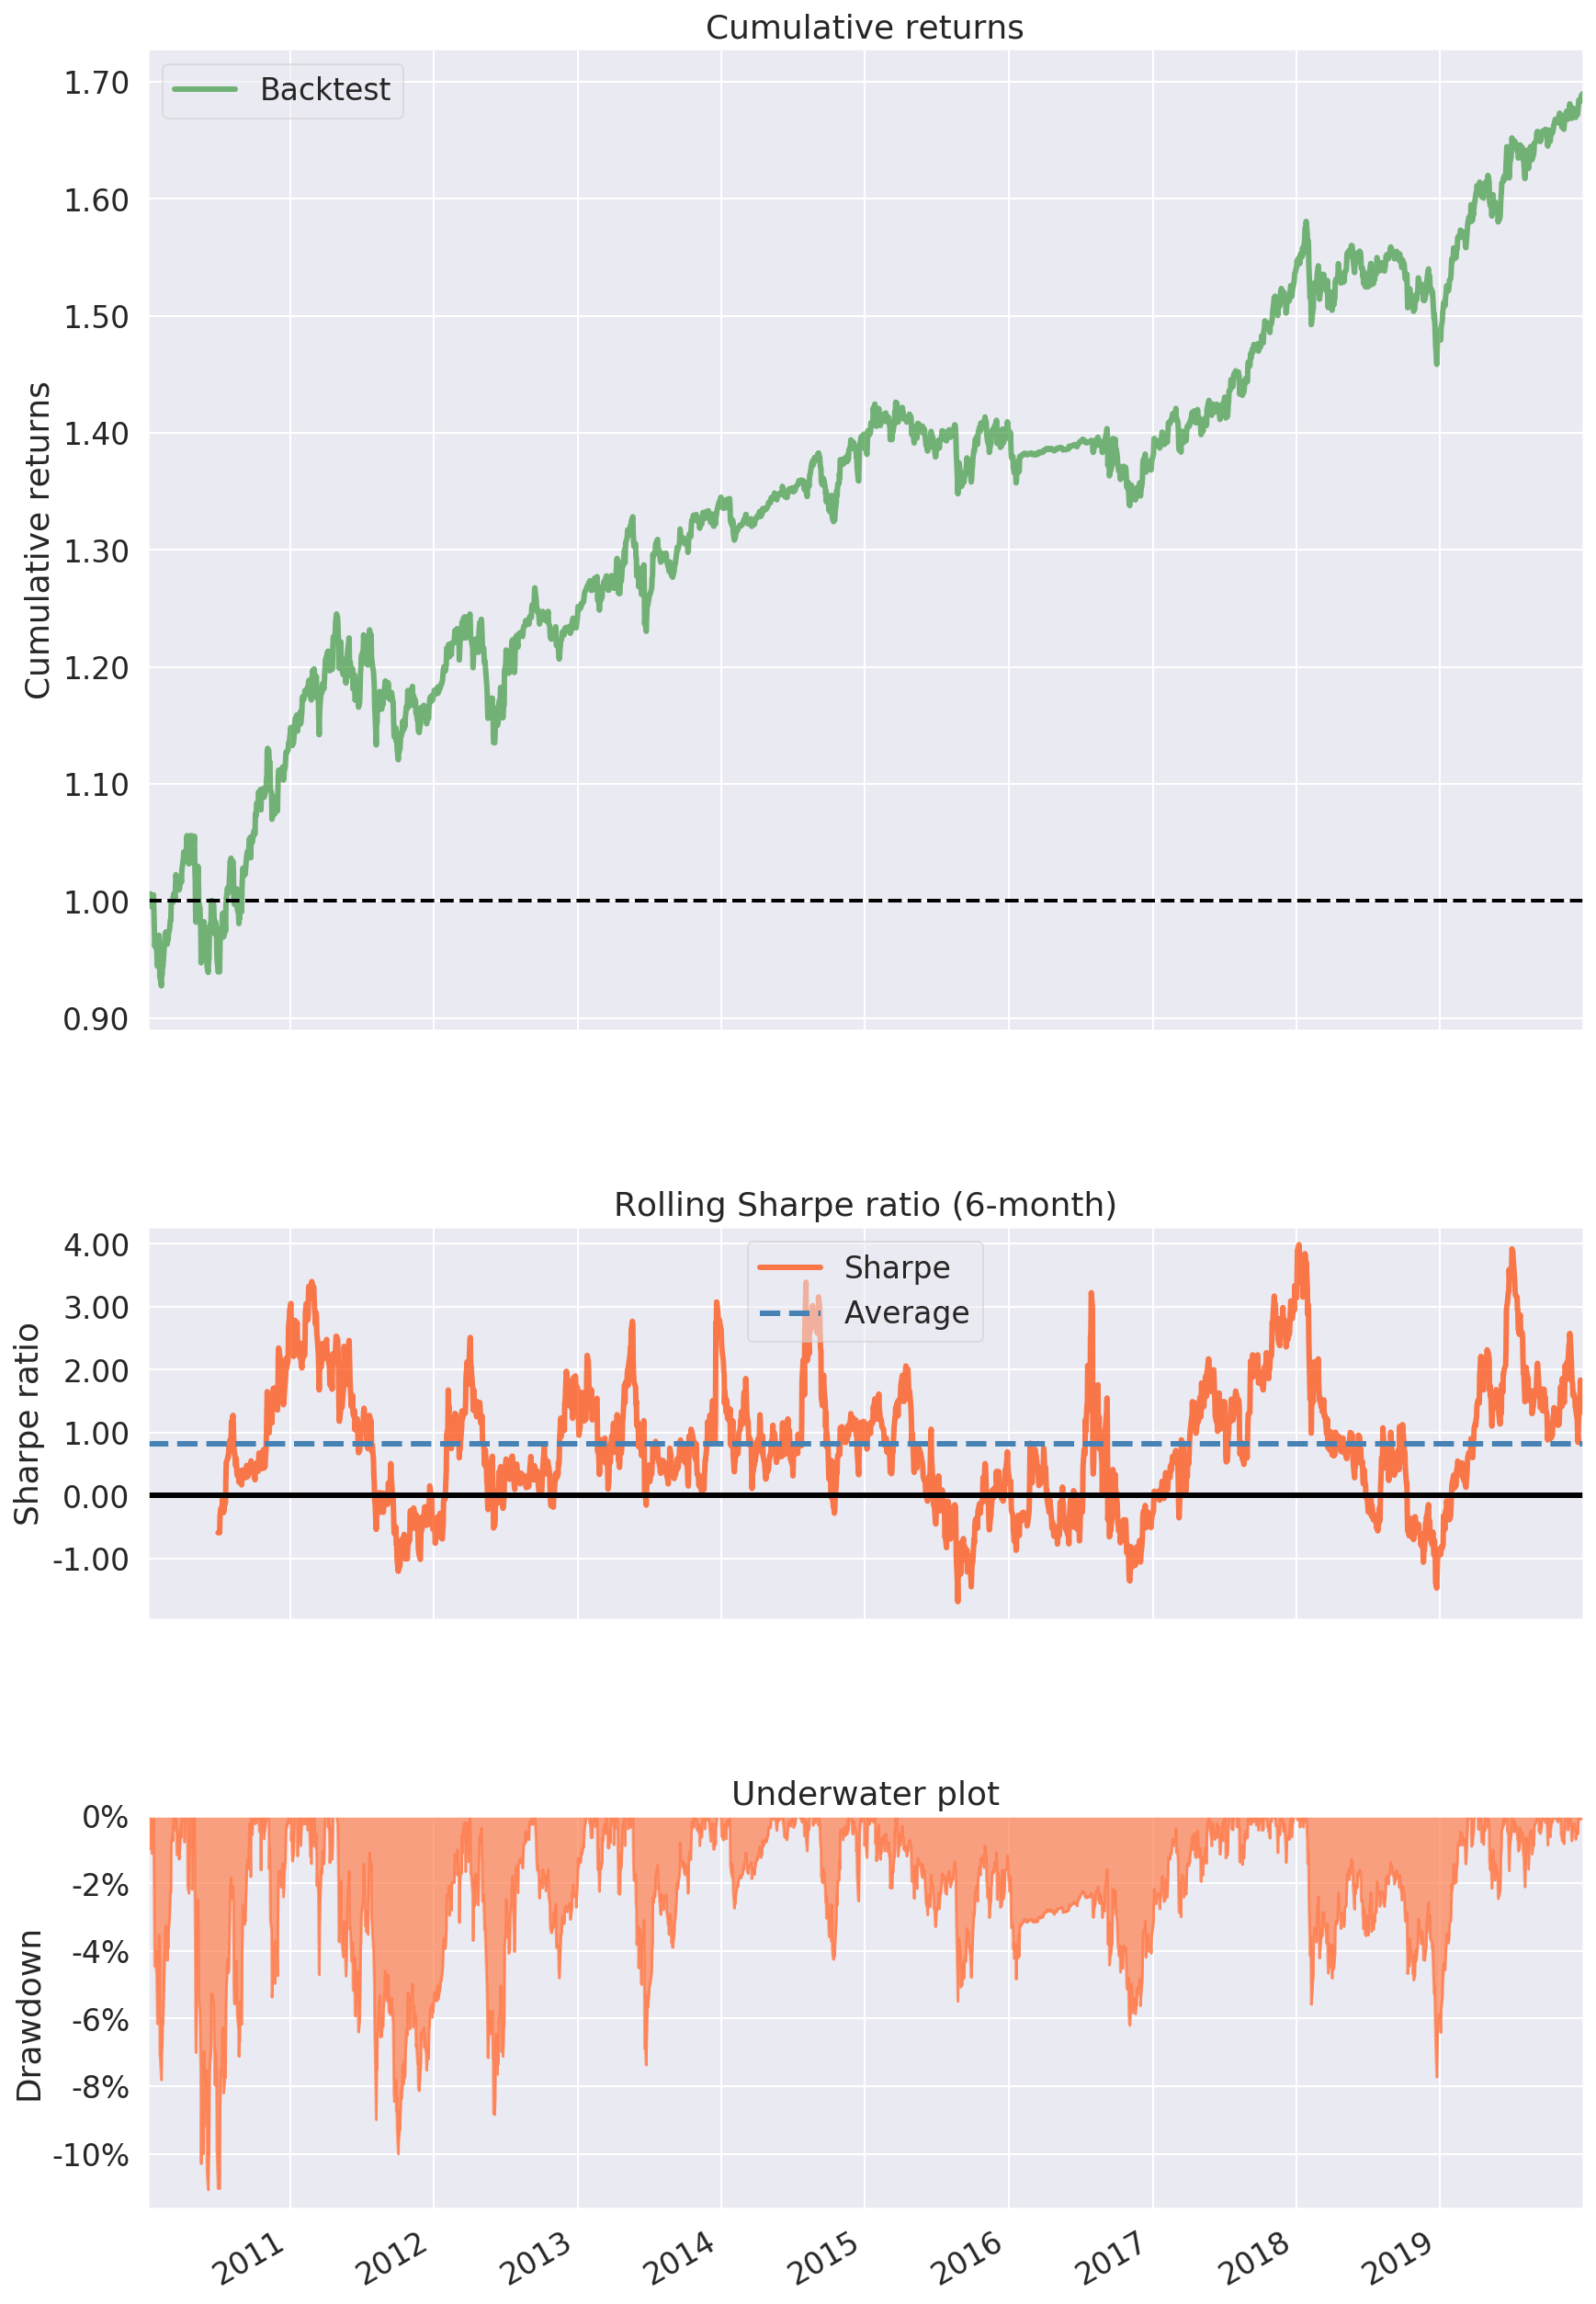

In [13]:
pf.create_simple_tear_sheet(returns = bt.balance['% change'].dropna())

Now we run the example with **semi-annualy rebalancing** but **without the sma criteria**

In [14]:
bt.run(initial_capital=1_000_000, periods=6, sma_days=None)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:45


capital            cash   total_value  \
2010-01-03 00:00:00+00:00  1.000000e+06  1000000.000000           NaN   
2010-01-04 00:00:00+00:00  1.000000e+06       96.545508  9.999035e+05   
2010-01-05 00:00:00+00:00  1.001321e+06       96.545508  1.001225e+06   
2010-01-06 00:00:00+00:00  1.005603e+06       96.545508  1.005507e+06   
2010-01-07 00:00:00+00:00  1.004723e+06       96.545508  1.004627e+06   
...                                 ...             ...           ...   
2019-12-24 00:00:00+00:00  1.822339e+06      194.850443  1.822144e+06   
2019-12-26 00:00:00+00:00  1.830703e+06      194.850443  1.830508e+06   
2019-12-27 00:00:00+00:00  1.833596e+06      194.850443  1.833401e+06   
2019-12-30 00:00:00+00:00  1.828571e+06      194.850443  1.828376e+06   
2019-12-31 00:00:00+00:00  1.830663e+06      194.850443  1.830468e+06   

                           % change  accumulated return  
2010-01-03 00:00:00+00:00       NaN                 NaN  
2010-01-04 00:00:00+00:00  0.000000            1.000000  
2010-01-05 00:00:00+00:00  0.001321            1.001321  
2010-01-06 00:00:00+00:00  0.004276            1.005603  
2010-01-07 00:00:00+00:00 -0.000875            1.004723  
...                             ...                 ...  
2019-12-24 00:00:00+00:00  0.001476            1.822339  
2019-12-26 00:00:00+00:00  0.004590            1.830703  
2019-12-27 00:00:00+00:00  0.001580            1.833596  
2019-12-30 00:00:00+00:00 -0.002740            1.828571  
2019-12-31 00:00:00+00:00  0.001144            1.830663  

[2517 rows x 5 columns]

the wealth over time:

In [15]:
returns_chart(bt.balance)

alt.VConcatChart(...)

the stats using pyfolio:

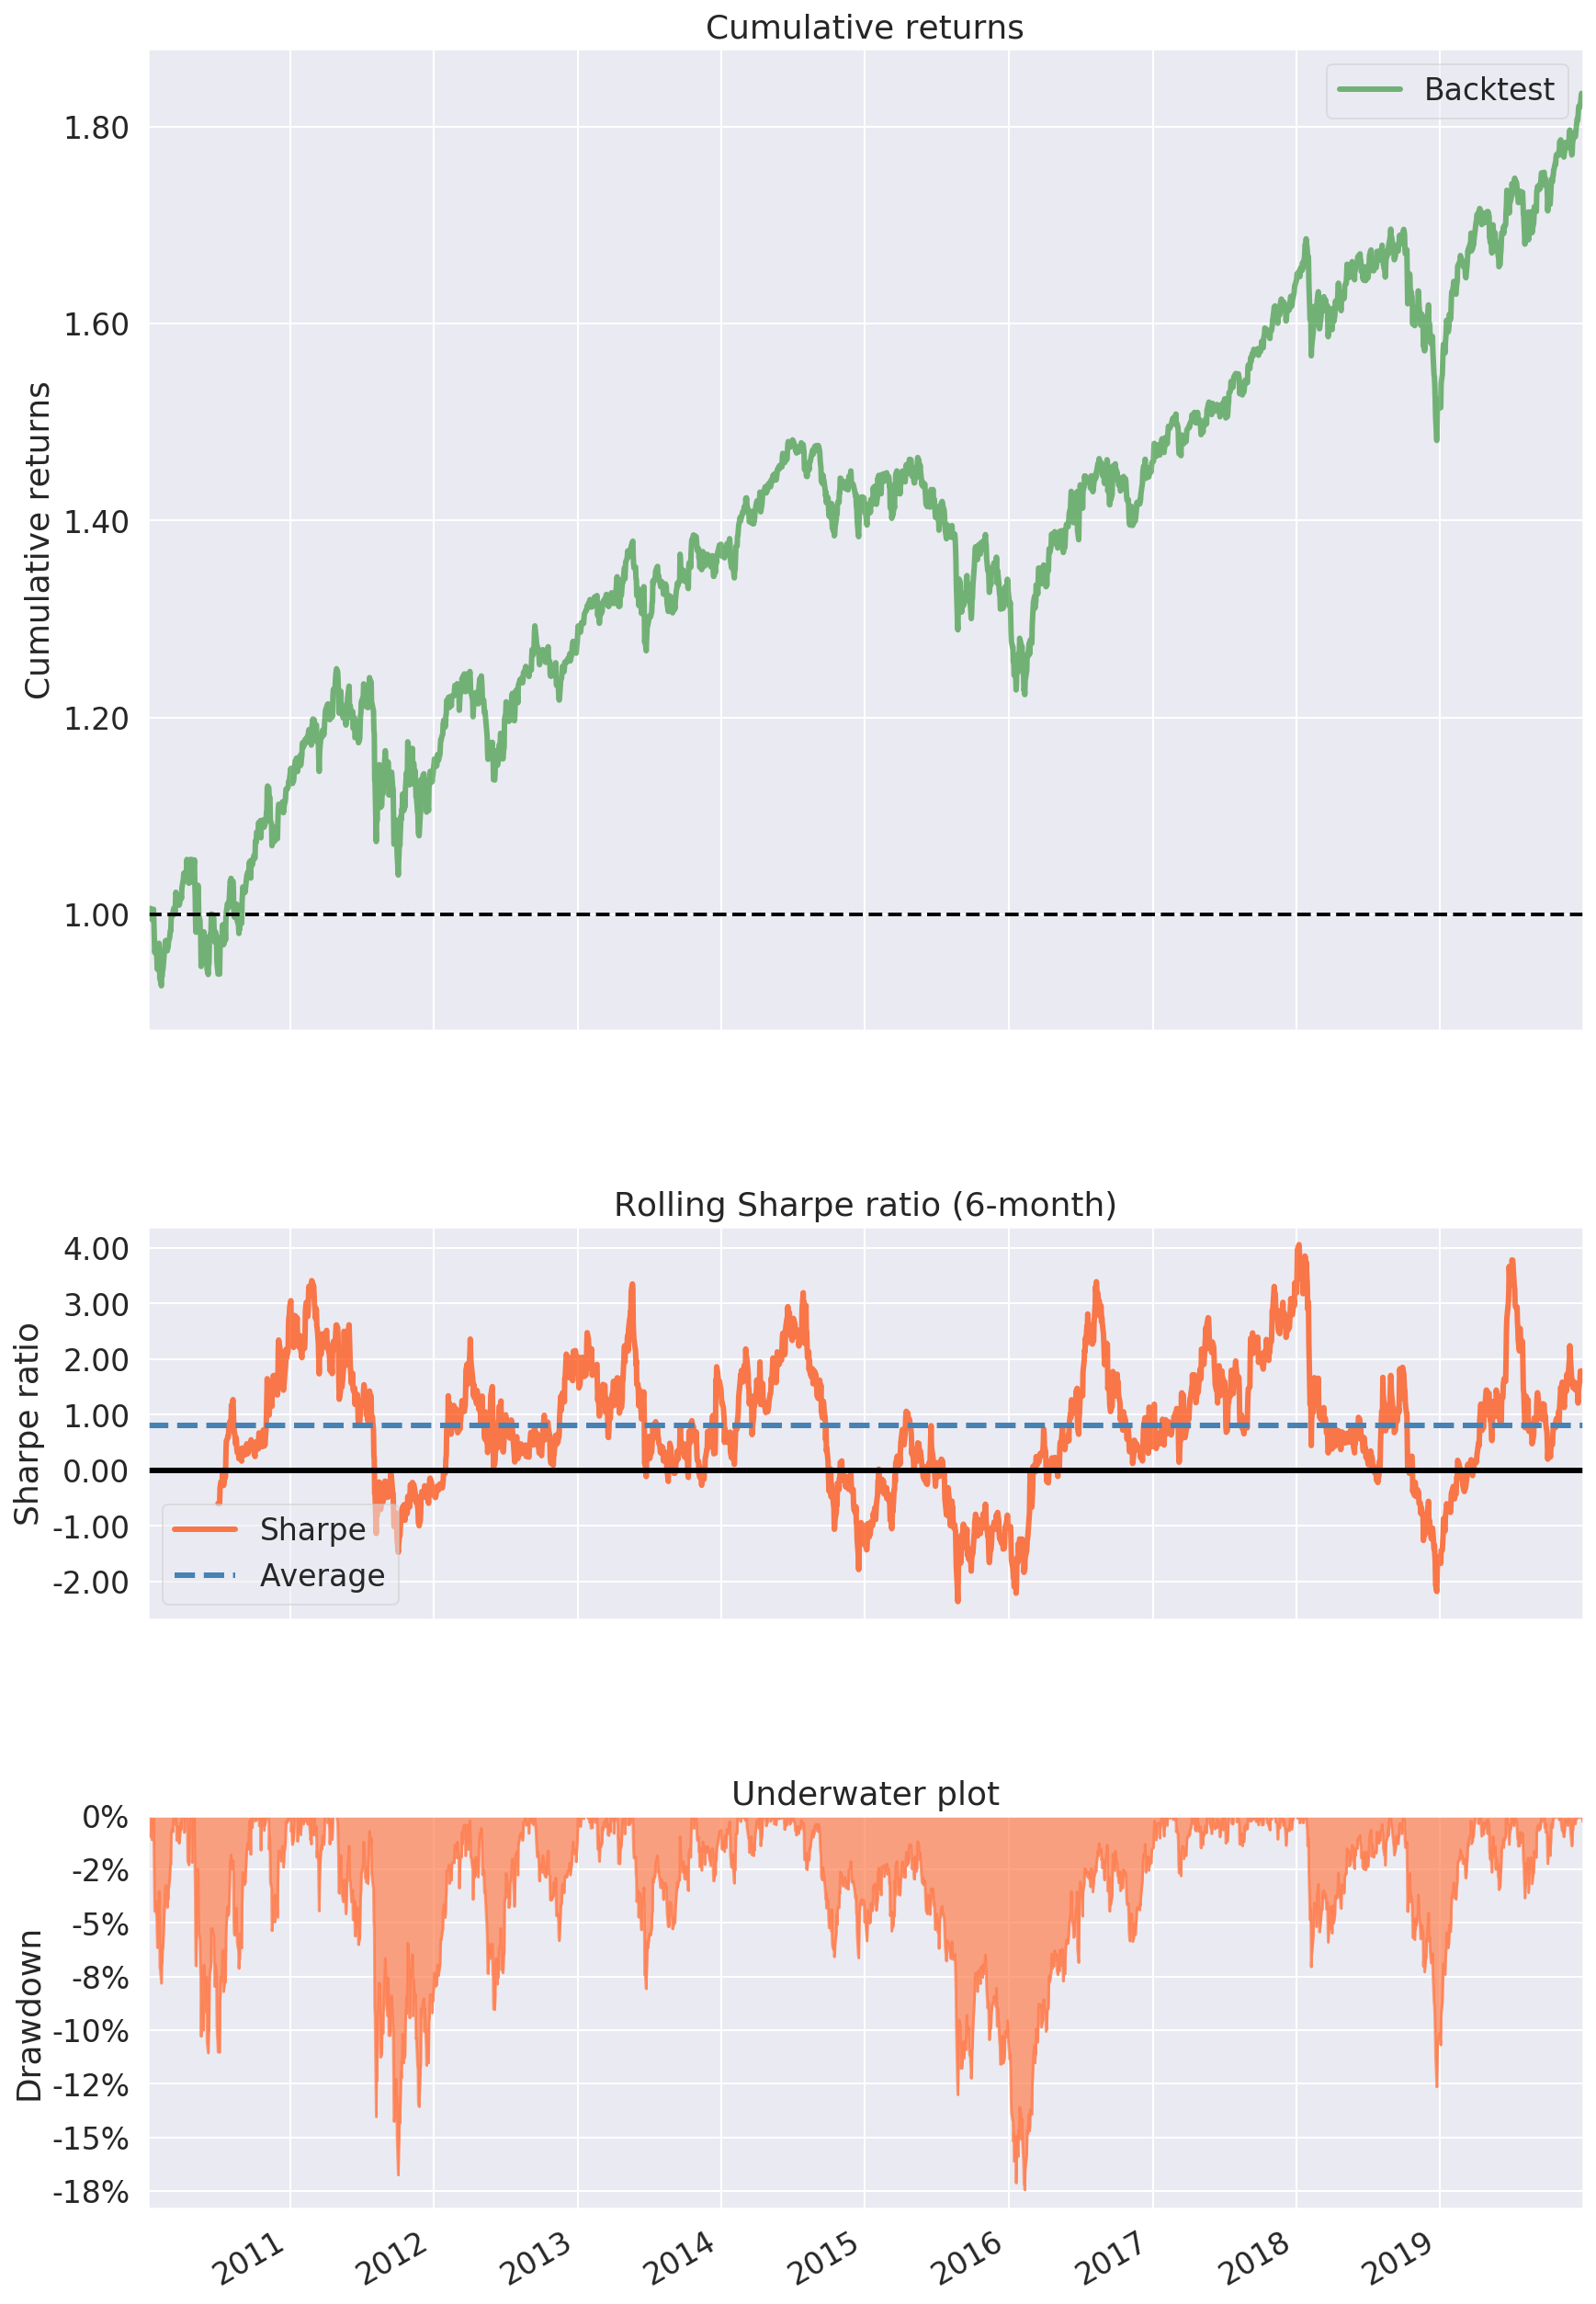

In [16]:
pf.create_simple_tear_sheet(returns = bt.balance['% change'].dropna())

#### Using sma when rebalancing, the absolute maximum drawdown value and whole area of the drawdown plot are smaller, having  also less annual volatility.